# Skin Segmentation

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
import numpy as np
import scipy as sp


In [2]:
#data = sp.genfromtxt("skin_color_binary.dat", delimiter = "\t")
data = np.genfromtxt('/Users/x/Desktop/::code/python/SKIN/Skin_NonSkin.txt', dtype=np.int32)
sp.random.shuffle(data)
data = np.array(data)
df = pd.DataFrame(data,index=data[:,0])
#sp.random.shuffle(df)
print("Last 10 rows of Data: \n" + str(data[-10:]))
print(data.shape)
df

Last 10 rows of Data: 
[[164 163 113   2]
 [184 183 139   2]
 [ 53  53  17   2]
 [166 167 128   2]
 [187 185 144   2]
 [200 198 163   2]
 [154 184 239   1]
 [212 216 221   2]
 [136 136  88   2]
 [167 164 113   2]]
(245057, 4)


,0,1,2,3
15,15,11,0,2
173,173,176,137,2
147,147,187,252,1
165,165,179,228,1
236,236,241,244,2
...,...,...,...,...
200,200,198,163,2
154,154,184,239,1
212,212,216,221,2
136,136,136,88,2


# ------------Visualize-----------

# Displaying the first 5 columns

In [3]:
df.head(20)

,0,1,2,3
15,15,11,0,2
173,173,176,137,2
147,147,187,252,1
165,165,179,228,1
236,236,241,244,2
149,149,190,253,1
107,107,119,237,2
164,164,164,116,2
57,57,59,23,2
66,66,67,25,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245057 entries, 15 to 167
Data columns (total 4 columns):
0    245057 non-null int32
1    245057 non-null int32
2    245057 non-null int32
3    245057 non-null int32
dtypes: int32(4)
memory usage: 5.6 MB


# Displaying the basic statistical details such as mean,std,min,max etc.

In [5]:
df.describe()

,0,1,2,3
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


# 245057 rows and 4 columns i.e. pixel values B,G,R and class label 

In [6]:
df.shape

(245057, 4)

# Total number of elements

In [7]:
# Total number of elements
df.size

980228

# Historgram plot for B,G,R pixels and class label

- As evident from the histogram plot below B,G,R pixel values have a variety of values while the class label has only 2 variables i.e. 1 and 2.

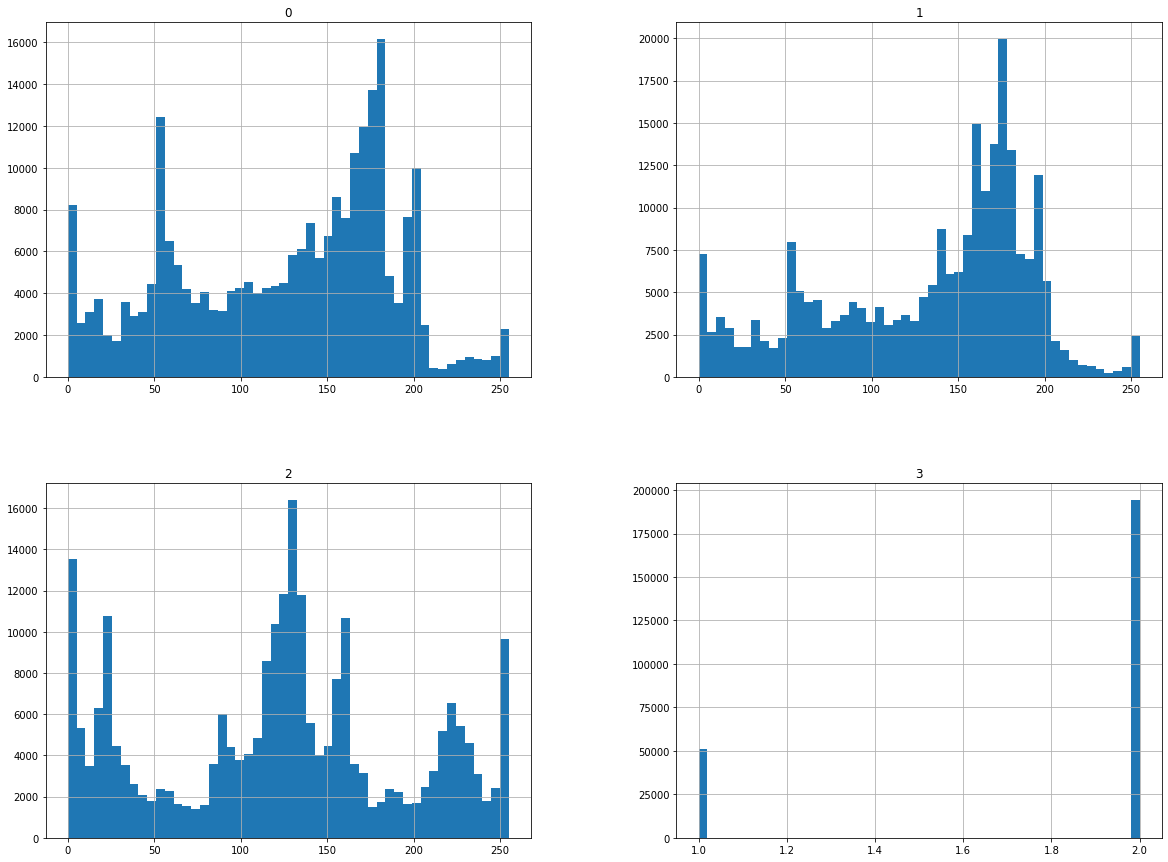

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()
#df.hist()

# Alloting column names to the data frame


In [9]:
df.columns=['B', 'G', 'R', 'class label']
df.head(5)


,B,G,R,class label
15,15,11,0,2
173,173,176,137,2
147,147,187,252,1
165,165,179,228,1
236,236,241,244,2


# Box plot for B,G,R

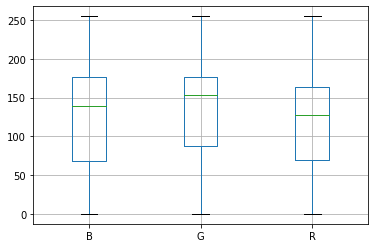

In [10]:
df.boxplot(column=['B', 'G', 'R'])

In [11]:

Y = data[:, (len(data[0]) - 1)] #equivalent to data[:, 3], we just made it generic
print("Last 10 labels: \n" + str(Y[-10:]))

X = data[:, range(0, 3)]
print("last 10 attributes: \n" + str(X[-10:]))

Last 10 labels: 
[2 2 2 2 2 2 1 2 2 2]
last 10 attributes: 
[[164 163 113]
 [184 183 139]
 [ 53  53  17]
 [166 167 128]
 [187 185 144]
 [200 198 163]
 [154 184 239]
 [212 216 221]
 [136 136  88]
 [167 164 113]]


In [12]:

def plotter(c, index, plt):
    label_colors = []
    for value in Y[:500]:
    	if value == 1:
    	    label_colors.append("yellow")
    	elif index == 0:
    	    label_colors.append("blue")
    	elif index == 1:
    	    label_colors.append("green")
    	else:
    	    label_colors.append("red")

    c.scatter(sp.arange(500), X[:500, index], c = label_colors )
    if index == 0:
    	c.set_xlabel("blue")
    	non_skin_patch = mpatches.Patch(color = "blue", label = "non-skin")
    elif index == 1:
    	c.set_xlabel("green")
    	non_skin_patch = mpatches.Patch(color = "green", label = "non-skin")
    else:
    	c.set_xlabel("red")
    	non_skin_patch = mpatches.Patch(color = "red", label = "non-skin")

    c.set_ylabel("pixel value")
    skin_patch = mpatches.Patch(color = "yellow", label = "skin")
    plt.legend(handles = [skin_patch, non_skin_patch], loc = "upper left")

# Plotting the B,G,R pixel values with respect to skin and non skin attributes.

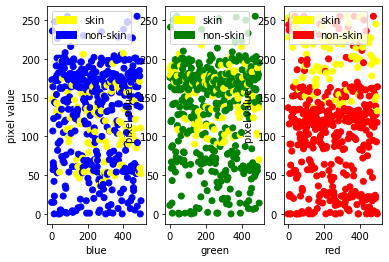

In [13]:
# part - 1

fig = plt.figure()
r = fig.add_subplot(131)
plotter(r, 0, plt)

g = fig.add_subplot(132)
plotter(g, 1, plt)

b = fig.add_subplot(133)
plotter(b, 2, plt)
plt.show()

In [14]:
skin_data = data[data[ : , 3] == 1]
print("min of skin colors: " + str(skin_data[ : , 2].min()))
print("max of skin colors: " + str(skin_data[ : , 2].max()))
display(skin_data.shape)

min of skin colors: 106
max of skin colors: 255


(50859, 4)

# Performing a 80-20 training -test split

In [15]:
def slow_Eu_Dist(p1, p2):
    	return np.sum( (p1-p2)**2)

def little_faster_Eu_Dist(x, y):
    	diff = np.array(x) - np.array(y)
    	return np.dot(diff, diff)

def faster_Eu_Dist(t, td):
	sd = np.zeros(shape = (1, len(td)));
	for i in range (0, len(t)):
		sd = sd + ((t[i] - td[:, i]) ** 2)
	return sd

from tqdm import tqdm
def NN_Classify(tr_X, tr_Y, te_X):
	prediction = []
	for te in tqdm(range(0, len(te_X))):
		#distances = np.array([slow_Eu_Dist(tr, te_X[te]) for tr in tr_X])
		#distances = np.array([np.linalg.norm(tr - te_X[te]) for tr in tr_X])
		#distances = np.array([little_faster_Eu_Dist(tr, te_X[te]) for tr in tr_X])
		#distances = faster_Eu_Dist(te_X[te], tr_X)#3":8'
		
		# removing a function call overhead makes it ever faster!!		
		distances = (te_X[te, 0] - tr_X[:, 0]) ** 2 + (te_X[te, 1] - tr_X[:, 1]) ** 2 + (te_X[te, 2] - tr_X[:, 2]) ** 2
		nearest = distances.argmin()
		prediction.append(tr_Y[nearest])
	return prediction

def NN_Score(actual, predicted):
	score = 0
	for i in range(0, len(actual)):
		if actual[i] == predicted[i]:
			score += 1
	return score / len(actual)

train_percent = 0.80
data_train = data[: int(data.shape[0]*train_percent)]
data_test = data[int(train_percent*data.shape[0]) : data.shape[0]]
display(data_train.shape)
display(data_test.shape)
tr_Y = data_train[:, (len(data[0]) - 1)]
tr_X = data_train[:, range(0, 3)]
te_Y = data_test[:, (len(data[0]) - 1)]
te_X = data_test[:, range(0, 3)]

predicted = NN_Classify(tr_X, tr_Y, te_X)
score = NN_Score(te_Y, predicted)

print("Achieved accuracy of " + str(score) + " precents!")

(196045, 4)

(49012, 4)

100%|██████████| 49012/49012 [00:33<00:00, 1450.45it/s]

Achieved accuracy of 0.9996735493348567 precents!


# K fold Cross Validation
number of folds =3

In [16]:
s_data = data[data[ : , 3] == 1]
ns_data = data[data[ : , 3] == 2]

print("Total Skin data: " + str(s_data.shape))
print("Total Non-Skin data: " + str(ns_data.shape))

folds = 3
total_score = 0
for i in range(0, folds):
    tr_s_data = sp.delete(s_data, [range( int(i*(len(s_data)/folds)), int((i+1)*(len(s_data)/folds)) )], 0)
    te_s_data = s_data[int(i*(len(s_data)/folds)) : int((i+1)*(len(s_data)/folds)), :]
    #print("te_s_data shape: " + str(te_s_data.shape))

    
    tr_ns_data = sp.delete(ns_data, [range( int(i*(len(ns_data)/folds)), int((i+1)*(len(ns_data)/folds)) )], 0)
    te_ns_data = ns_data[int(i*(len(ns_data)/folds)):int((i+1)*(len(ns_data)/folds)), :]
    #print("te_ns_data shape: " + str(te_ns_data.shape))

    
    tr_data = np.vstack((tr_s_data, tr_ns_data))
    te_data = np.vstack((te_s_data, te_ns_data))

    np.random.shuffle(tr_data)
    np.random.shuffle(te_data)

    #print("tr_data shape: " + str(tr_data.shape))
    #print("te_data shape: " + str(te_data.shape))


    tr_Y = tr_data[:, (len(tr_data[0]) - 1)]
    tr_X = tr_data[:, range(0, 3)]
    te_Y = te_data[:, (len(tr_data[0]) - 1)]
    te_X = te_data[:, range(0, 3)]
    
    predicted = NN_Classify(tr_X, tr_Y, te_X)
    score = NN_Score(te_Y, predicted)
    print("score in fold " + str(i) + ": " + str(score))
    total_score += score
    
avg_score = total_score / folds
print("for " + str(folds) + " folds cross validation, accuracy is: " + str(avg_score))

Total Skin data: (50859, 4)
Total Non-Skin data: (194198, 4)


100%|██████████| 81685/81685 [00:41<00:00, 1968.40it/s]


score in fold 0: 0.9994246189630899


100%|██████████| 81686/81686 [00:42<00:00, 1917.44it/s]


score in fold 1: 0.9996327400044072


100%|██████████| 81686/81686 [00:40<00:00, 2030.08it/s]

score in fold 2: 0.9995348040055824
for 3 folds cross validation, accuracy is: 0.9995307209910265


# Performing a 90-10 split 

In [17]:
def slow_Eu_Dist(p1, p2):
    	return np.sum( (p1-p2)**2)

def little_faster_Eu_Dist(x, y):
    	diff = np.array(x) - np.array(y)
    	return np.dot(diff, diff)

def faster_Eu_Dist(t, td):
	sd = np.zeros(shape = (1, len(td)));
	for i in range (0, len(t)):
		sd = sd + ((t[i] - td[:, i]) ** 2)
	return sd

from tqdm import tqdm
def NN_Classify(tr_X, tr_Y, te_X):
	prediction = []
	for te in tqdm(range(0, len(te_X))):
		#distances = np.array([slow_Eu_Dist(tr, te_X[te]) for tr in tr_X])
		#distances = np.array([np.linalg.norm(tr - te_X[te]) for tr in tr_X])
		#distances = np.array([little_faster_Eu_Dist(tr, te_X[te]) for tr in tr_X])
		#distances = faster_Eu_Dist(te_X[te], tr_X)#3":8'
		
		# removing a function call overhead makes it ever faster!!		
		distances = (te_X[te, 0] - tr_X[:, 0]) ** 2 + (te_X[te, 1] - tr_X[:, 1]) ** 2 + (te_X[te, 2] - tr_X[:, 2]) ** 2
		nearest = distances.argmin()
		prediction.append(tr_Y[nearest])
	return prediction

def NN_Score(actual, predicted):
	score = 0
	for i in range(0, len(actual)):
		if actual[i] == predicted[i]:
			score += 1
	return score / len(actual)

train_percent = 0.10
data_train = data[: int(data.shape[0]*train_percent)]
data_test = data[int(train_percent*data.shape[0]) : data.shape[0]]

tr_Y = data_train[:, (len(data[0]) - 1)]
tr_X = data_train[:, range(0, 3)]
te_Y = data_test[:, (len(data[0]) - 1)]
te_X = data_test[:, range(0, 3)]

predicted = NN_Classify(tr_X, tr_Y, te_X)
score = NN_Score(te_Y, predicted)

print("Achieved accuracy of " + str(score) + " percent!")

100%|██████████| 220552/220552 [00:16<00:00, 13565.18it/s]


Achieved accuracy of 0.9990841162174907 percent!


# 5 fold cross validation

In [18]:
s_data = data[data[ : , 3] == 1]
ns_data = data[data[ : , 3] == 2]

print("Total Skin data: " + str(s_data.shape))
print("Total Non-Skin data: " + str(ns_data.shape))

folds = 5
total_score = 0
for i in range(0, folds):
    tr_s_data = sp.delete(s_data, [range( int(i*(len(s_data)/folds)), int((i+1)*(len(s_data)/folds)) )], 0)
    te_s_data = s_data[int(i*(len(s_data)/folds)) : int((i+1)*(len(s_data)/folds)), :]
    #print("te_s_data shape: " + str(te_s_data.shape))

    
    tr_ns_data = sp.delete(ns_data, [range( int(i*(len(ns_data)/folds)), int((i+1)*(len(ns_data)/folds)) )], 0)
    te_ns_data = ns_data[int(i*(len(ns_data)/folds)):int((i+1)*(len(ns_data)/folds)), :]
    #print("te_ns_data shape: " + str(te_ns_data.shape))

    
    tr_data = np.vstack((tr_s_data, tr_ns_data))
    te_data = np.vstack((te_s_data, te_ns_data))

    np.random.shuffle(tr_data)
    np.random.shuffle(te_data)

    #print("tr_data shape: " + str(tr_data.shape))
    #print("te_data shape: " + str(te_data.shape))


    tr_Y = tr_data[:, (len(tr_data[0]) - 1)]
    tr_X = tr_data[:, range(0, 3)]
    te_Y = te_data[:, (len(tr_data[0]) - 1)]
    te_X = te_data[:, range(0, 3)]
    
    predicted = NN_Classify(tr_X, tr_Y, te_X)
    score = NN_Score(te_Y, predicted)
    print("score in fold " + str(i) + ": " + str(score))
    total_score += score
    
avg_score = total_score / folds
print("for " + str(folds) + " folds cross validation, accuracy is: " + str(avg_score))

Total Skin data: (50859, 4)
Total Non-Skin data: (194198, 4)


100%|██████████| 49010/49010 [00:28<00:00, 1692.74it/s]


score in fold 0: 0.9995919200163232


100%|██████████| 49012/49012 [00:28<00:00, 1706.91it/s]


score in fold 1: 0.9994491145025708


100%|██████████| 49011/49011 [00:28<00:00, 1700.33it/s]


score in fold 2: 0.9996327355083553


100%|██████████| 49012/49012 [00:28<00:00, 1710.13it/s]


score in fold 3: 0.9995103240022851


100%|██████████| 49012/49012 [00:28<00:00, 1702.66it/s]

score in fold 4: 0.9995919366685709
for 5 folds cross validation, accuracy is: 0.9995552061396211


# Using 50-50 train test split

In [19]:
def slow_Eu_Dist(p1, p2):
    	return np.sum( (p1-p2)**2)

def little_faster_Eu_Dist(x, y):
    	diff = np.array(x) - np.array(y)
    	return np.dot(diff, diff)

def faster_Eu_Dist(t, td):
	sd = np.zeros(shape = (1, len(td)));
	for i in range (0, len(t)):
		sd = sd + ((t[i] - td[:, i]) ** 2)
	return sd

from tqdm import tqdm
def NN_Classify(tr_X, tr_Y, te_X):
	prediction = []
	for te in tqdm(range(0, len(te_X))):
		#distances = np.array([slow_Eu_Dist(tr, te_X[te]) for tr in tr_X])
		#distances = np.array([np.linalg.norm(tr - te_X[te]) for tr in tr_X])
		#distances = np.array([little_faster_Eu_Dist(tr, te_X[te]) for tr in tr_X])
		#distances = faster_Eu_Dist(te_X[te], tr_X)#3":8'
		
		# removing a function call overhead makes it ever faster!!		
		distances = (te_X[te, 0] - tr_X[:, 0]) ** 2 + (te_X[te, 1] - tr_X[:, 1]) ** 2 + (te_X[te, 2] - tr_X[:, 2]) ** 2
		nearest = distances.argmin()
		prediction.append(tr_Y[nearest])
	return prediction

def NN_Score(actual, predicted):
	score = 0
	for i in range(0, len(actual)):
		if actual[i] == predicted[i]:
			score += 1
	return score / len(actual)

train_percent = 0.50
data_train = data[: int(data.shape[0]*train_percent)]
data_test = data[int(train_percent*data.shape[0]) : data.shape[0]]
display(data_train.shape)
display(data_test.shape)
tr_Y = data_train[:, (len(data[0]) - 1)]
tr_X = data_train[:, range(0, 3)]
te_Y = data_test[:, (len(data[0]) - 1)]
te_X = data_test[:, range(0, 3)]

predicted = NN_Classify(tr_X, tr_Y, te_X)
score = NN_Score(te_Y, predicted)

print("Achieved accuracy of " + str(score) + " precents!")

(122528, 4)

(122529, 4)

100%|██████████| 122529/122529 [00:44<00:00, 2768.07it/s]

Achieved accuracy of 0.9995348040055824 precents!


# 10 fold CV

In [20]:
s_data = data[data[ : , 3] == 1]
ns_data = data[data[ : , 3] == 2]

print("Total Skin data: " + str(s_data.shape))
print("Total Non-Skin data: " + str(ns_data.shape))

folds = 10
total_score = 0
for i in range(0, folds):
    tr_s_data = sp.delete(s_data, [range( int(i*(len(s_data)/folds)), int((i+1)*(len(s_data)/folds)) )], 0)
    te_s_data = s_data[int(i*(len(s_data)/folds)) : int((i+1)*(len(s_data)/folds)), :]
    #print("te_s_data shape: " + str(te_s_data.shape))

    
    tr_ns_data = sp.delete(ns_data, [range( int(i*(len(ns_data)/folds)), int((i+1)*(len(ns_data)/folds)) )], 0)
    te_ns_data = ns_data[int(i*(len(ns_data)/folds)):int((i+1)*(len(ns_data)/folds)), :]
    #print("te_ns_data shape: " + str(te_ns_data.shape))

    
    tr_data = np.vstack((tr_s_data, tr_ns_data))
    te_data = np.vstack((te_s_data, te_ns_data))

    np.random.shuffle(tr_data)
    np.random.shuffle(te_data)

    #print("tr_data shape: " + str(tr_data.shape))
    #print("te_data shape: " + str(te_data.shape))


    tr_Y = tr_data[:, (len(tr_data[0]) - 1)]
    tr_X = tr_data[:, range(0, 3)]
    te_Y = te_data[:, (len(tr_data[0]) - 1)]
    te_X = te_data[:, range(0, 3)]
    
    predicted = NN_Classify(tr_X, tr_Y, te_X)
    score = NN_Score(te_Y, predicted)
    print("score in fold " + str(i) + ": " + str(score))
    total_score += score
    
avg_score = total_score / folds
print("for " + str(folds) + " folds cross validation, accuracy is: " + str(avg_score))

Total Skin data: (50859, 4)
Total Non-Skin data: (194198, 4)


100%|██████████| 24504/24504 [00:16<00:00, 1506.06it/s]


score in fold 0: 0.9997143323539014


100%|██████████| 24506/24506 [00:16<00:00, 1511.29it/s]


score in fold 1: 0.9995103240022851


100%|██████████| 24506/24506 [00:16<00:00, 1508.43it/s]


score in fold 2: 0.9992654860034277


100%|██████████| 24506/24506 [00:16<00:00, 1503.12it/s]


score in fold 3: 0.9995919366685709


100%|██████████| 24506/24506 [00:16<00:00, 1519.17it/s]


score in fold 4: 0.9996735493348567


100%|██████████| 24505/24505 [00:16<00:00, 1506.41it/s]


score in fold 5: 0.9995103040195878


100%|██████████| 24506/24506 [00:16<00:00, 1510.92it/s]


score in fold 6: 0.9995919366685709


100%|██████████| 24506/24506 [00:16<00:00, 1510.48it/s]


score in fold 7: 0.9995919366685709


100%|██████████| 24506/24506 [00:16<00:00, 1508.54it/s]


score in fold 8: 0.9996327430017139


100%|██████████| 24506/24506 [00:16<00:00, 1505.66it/s]

score in fold 9: 0.9995103240022851
for 10 folds cross validation, accuracy is: 0.9995592872723771


# Testing on Real Data

img = sp.misc.imread('test_4.jpg')
print(img.shape)
w, h = img.shape[0:2]
img = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
img[:, [0, 2]] = img[:, [2, 0]]
print(img.shape)
# now we do not mind using all the data
tr_Y = data[:, (len(data[0]) - 1)]
tr_X = data[:, range(0, len(data[0]))]
predicted = np.array(NN_Classify(tr_X, tr_Y, img))

# if skin -white, black otherwise!
new_img = np.zeros(shape = (w*h, 3), dtype=np.uint8)
print("new image is of : " + str(new_img.shape))
print("predicted is of : " + str(predicted.shape))
for i in range(0, len(img)):
    if predicted[i] != 2.0:
        new_img[i] = [255, 255, 255]

new_img = new_img.reshape((w, h, 3))
import matplotlib.pyplot as plt
plt.imshow(new_img)
plt.savefig('test_4_out.jpg')
plt.show()
plt.close()

# KNN

Last 10 rows of Data: 
[[156 158 112   2]
 [ 72  87 126   1]
 [193 193 169   2]
 [174 172 124   2]
 [ 84  82  28   2]
 [177 174 129   2]
 [120 161 210   1]
 [197 195 161   2]
 [173 172 122   2]
 [ 42  43  41   2]]
(245057, 4)
Last 10 labels: 
[2 1 2 2 2 2 1 2 2 2]
last 10 attributes: 
[[156 158 112]
 [ 72  87 126]
 [193 193 169]
 [174 172 124]
 [ 84  82  28]
 [177 174 129]
 [120 161 210]
 [197 195 161]
 [173 172 122]
 [ 42  43  41]]


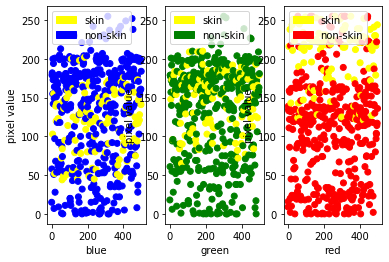

In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [19]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(tr_X,tr_Y)
    yhat=neigh.predict(te_X)
    mean_acc[n-1] = metrics.accuracy_score(te_Y, yhat)

    
    std_acc[n-1]=np.std(yhat==te_Y)/np.sqrt(yhat.shape[0])

print("mean acuuracy:",mean_acc)
print("standard acuuracy:",std_acc)

mean acuuracy: [0.99958377 0.99946135 0.99954705 0.99943687 0.99947359 0.99941238
 0.99943687 0.99936342 0.99940014 0.99926548 0.99925324 0.99922875
 0.99930221 0.99920427 0.99921651 0.9991553  0.9991553  0.99906961
 0.99906961 0.99905737 0.99905737 0.99902064 0.99902064 0.9990084
 0.9990084  0.99895943 0.99895943 0.99887374 0.99888598 0.99886149
 0.99886149 0.99882477 0.99881253 0.99878804 0.99878804 0.99876356
 0.99876356 0.99873907 0.99875132 0.99871459 0.99871459 0.99866562
 0.99866562 0.9986289  0.9986289  0.99861665 0.99861665 0.99860441
 0.99864114 0.99861665 0.99861665 0.99857993 0.99859217 0.99855544
 0.99857993 0.99853096 0.9985432  0.9985432  0.99855544 0.99851872
 0.99851872 0.99850648 0.99850648 0.99846975 0.99849423 0.99844527
 0.99846975 0.99843302 0.99843302 0.9983963  0.9983963  0.9983963
 0.9983963  0.99838406 0.99838406 0.99835957 0.99835957 0.99829836
 0.99829836 0.99821267 0.99822491 0.99815146 0.99815146 0.99813922
 0.9981637  0.99809025 0.99811473 0.99805352 0.99

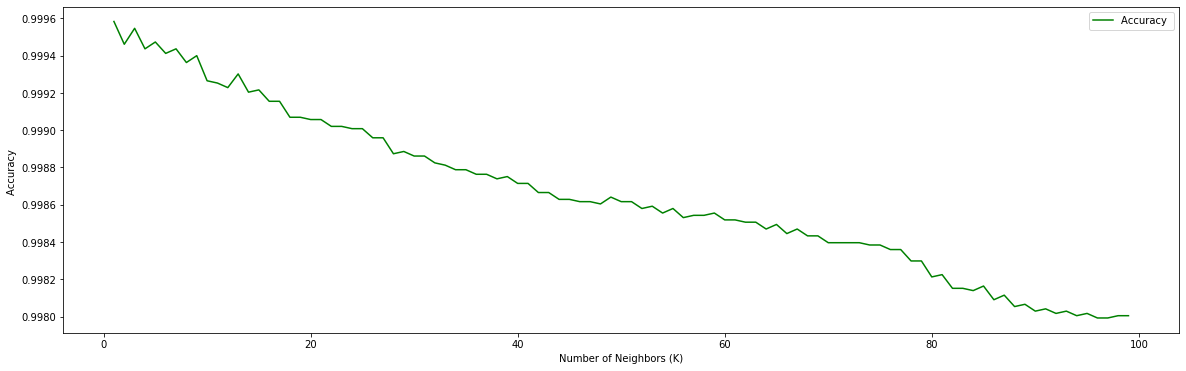

In [20]:
plt.figure(figsize=(20,6))
plt.plot(range(1,Ks),mean_acc,'g')
#plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
#plt.tight_layout()
plt.show()

In [21]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9995837720049947 with k= 1


# LINEAR REGRESSION

In [26]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

In [27]:
regr.fit(tr_X,tr_Y)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
regr.coef_

array([ 0.00339161, -0.00022773, -0.00450542])

In [29]:
y_hat_linear=regr.predict(te_X)

In [30]:
#Mean Square Error
MSE = np.square(np.subtract(y_hat_linear,te_Y)).mean()
print("MSE is:",MSE)

MSE is: 0.079507248135006


In [31]:
#r2 score
from sklearn.metrics import r2_score
score=r2_score(y_hat_linear,te_Y)
print("r2 score is:",score)

accuracy = regr.score(tr_X,tr_Y)
print(accuracy*100,'%')

r2 score is: 0.05707000824415742
51.10700669296888 %


# POLYNOMIAL REGRESSION

# For degree=2

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(tr_X)
train_x_poly

array([[1.0000e+00, 1.8800e+02, 1.8700e+02, ..., 3.4969e+04, 2.7863e+04,
        2.2201e+04],
       [1.0000e+00, 1.7800e+02, 1.7100e+02, ..., 2.9241e+04, 2.1888e+04,
        1.6384e+04],
       [1.0000e+00, 1.8100e+02, 1.7800e+02, ..., 3.1684e+04, 2.3852e+04,
        1.7956e+04],
       ...,
       [1.0000e+00, 2.2300e+02, 1.0900e+02, ..., 1.1881e+04, 1.1118e+04,
        1.0404e+04],
       [1.0000e+00, 5.3000e+01, 5.3000e+01, ..., 2.8090e+03, 9.0100e+02,
        2.8900e+02],
       [1.0000e+00, 1.7800e+02, 1.7500e+02, ..., 3.0625e+04, 2.2925e+04,
        1.7161e+04]])

In [33]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, tr_Y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.00000000e+00  3.95167979e-03 -9.14288205e-03 -1.08374026e-03
  1.07882935e-06  5.02118789e-06 -1.87790612e-05  5.77741098e-05
 -3.12233769e-05  6.06566738e-06]
Intercept:  2.1078188782177554


In [34]:
test_x_poly = poly.fit_transform(te_X)
test_y = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - te_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - te_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , te_Y) )

Mean absolute error: 0.14
Residual sum of squares (MSE): 0.05
R2-score: 0.56


In [35]:
accuracy = clf.score(train_x_poly, tr_Y)
print(accuracy*100,'%')

69.09828164265633 %


# For degree=3

In [36]:
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(tr_X)
train_x_poly

array([[1.000000e+00, 1.880000e+02, 1.870000e+02, ..., 5.210381e+06,
        4.151587e+06, 3.307949e+06],
       [1.000000e+00, 1.780000e+02, 1.710000e+02, ..., 3.742848e+06,
        2.801664e+06, 2.097152e+06],
       [1.000000e+00, 1.810000e+02, 1.780000e+02, ..., 4.245656e+06,
        3.196168e+06, 2.406104e+06],
       ...,
       [1.000000e+00, 2.230000e+02, 1.090000e+02, ..., 1.211862e+06,
        1.134036e+06, 1.061208e+06],
       [1.000000e+00, 5.300000e+01, 5.300000e+01, ..., 4.775300e+04,
        1.531700e+04, 4.913000e+03],
       [1.000000e+00, 1.780000e+02, 1.750000e+02, ..., 4.011875e+06,
        3.003175e+06, 2.248091e+06]])

In [37]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, tr_Y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.00000000e+00 -7.95881291e-04  1.78169304e-03 -1.79743314e-03
  3.96811230e-05 -3.18940303e-05  4.22914819e-05 -2.84169394e-05
 -5.11300354e-06 -4.69231875e-05 -1.63531856e-07  1.17940211e-07
  8.71697295e-08 -3.32075183e-08  5.37737645e-08 -2.85070438e-07
  1.17170086e-07  2.32467849e-07 -2.87309955e-07  2.87519321e-07]
Intercept:  2.005760530462794


In [38]:
test_x_poly = poly.fit_transform(te_X)
test_y = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - te_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - te_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , te_Y) )

Mean absolute error: 0.10
Residual sum of squares (MSE): 0.03
R2-score: 0.75


In [39]:
accuracy = clf.score(train_x_poly, tr_Y)
print(accuracy*100,'%')

79.52991521430339 %


# For degree=5

In [40]:
poly = PolynomialFeatures(degree=5)
train_x_poly = poly.fit_transform(tr_X)
train_x_poly

array([[1.00000000e+00, 1.88000000e+02, 1.87000000e+02, ...,
        1.15675669e+11, 9.21693830e+10, 7.34397757e+10],
       [1.00000000e+00, 1.78000000e+02, 1.71000000e+02, ...,
        6.13228216e+10, 4.59024630e+10, 3.43597384e+10],
       [1.00000000e+00, 1.81000000e+02, 1.78000000e+02, ...,
        7.62349991e+10, 5.73903926e+10, 4.32040034e+10],
       ...,
       [1.00000000e+00, 2.23000000e+02, 1.09000000e+02, ...,
        1.26082122e+10, 1.17985105e+10, 1.10408080e+10],
       [1.00000000e+00, 5.30000000e+01, 5.30000000e+01, ...,
        1.38006170e+07, 4.42661300e+06, 1.41985700e+06],
       [1.00000000e+00, 1.78000000e+02, 1.75000000e+02, ...,
        6.88477869e+10, 5.15374862e+10, 3.85794897e+10]])

In [41]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, tr_Y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.00000000e+00 -7.74062997e-03  2.34360451e-03  8.40932341e-03
  2.58212877e-04 -2.25582653e-04 -2.20179070e-05  1.25721832e-04
 -1.39803340e-04 -1.79467488e-04 -2.67870378e-06  1.11264944e-07
  1.94263979e-06  3.31767836e-06  7.72965445e-07 -1.44280173e-06
 -2.89796715e-06  7.72334835e-07  1.05918264e-06  1.00159082e-06
  1.06876862e-08 -1.17842670e-09 -4.60917225e-09 -3.54061042e-09
  9.58514094e-09 -8.67730782e-09 -1.39508902e-08 -2.10864186e-08
  1.89731621e-09  1.17300668e-08  1.79523540e-08  1.99500453e-09
  5.48838074e-09 -1.47010138e-08 -1.20736842e-10 -1.44480727e-11
 -3.39662095e-13 -1.14175679e-11  2.31698530e-11 -1.54340157e-11
  4.74234145e-11 -1.01072838e-11 -6.37168881e-12 -1.90185981e-11
 -1.35625762e-11  2.45193493e-11  3.27023240e-11  3.31677450e-11
 -2.24786826e-12 -2.26300766e-11 -3.41656891e-11 -1.96130932e-11
  3.75196926e-11 -6.84432097e-11  5.93358686e-11 -6.32111222e-12]
Intercept:  2.0218392534350906


In [42]:
test_x_poly = poly.fit_transform(te_X)
test_y = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y - te_Y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - te_Y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , te_Y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: 0.90


In [43]:
accuracy = clf.score(train_x_poly, tr_Y)
print(accuracy*100,'%')

90.86709306962132 %


# LOGISTIC REGRESSION

In [26]:
# Importing the necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
import pickle
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
clf = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=3)
clf.fit(tr_X,tr_Y)
y_out = clf.predict(te_X)
#accuracy_score(y_test, y_out)

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(te_Y, y_out))

print((classification_report(te_Y,y_out )))
#confusion_matrix(y_test, y_out)

0.9085155350978136
              precision    recall  f1-score   support

           1       0.75      0.84      0.79     16953
           2       0.96      0.93      0.94     64733

    accuracy                           0.91     81686
   macro avg       0.85      0.88      0.87     81686
weighted avg       0.91      0.91      0.91     81686



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Tuning  max_iterations 
set 100

In [ ]:
# changing max_iter to 100

In [27]:
# Importing the necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
import pickle
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
clf = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=100)
clf.fit(tr_X,tr_Y)
y_out = clf.predict(te_X)
#accuracy_score(y_test, y_out)

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(te_Y, y_out))

print((classification_report(te_Y,y_out )))
#confusion_matrix(y_test, y_out)

0.9193986729672159
              precision    recall  f1-score   support

           1       0.80      0.82      0.81     16953
           2       0.95      0.95      0.95     64733

    accuracy                           0.92     81686
   macro avg       0.88      0.88      0.88     81686
weighted avg       0.92      0.92      0.92     81686



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [52]:
# changing max_iter to 1000

In [28]:
# Importing the necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
import pickle
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
clf = LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000)
clf.fit(tr_X,tr_Y)
y_out = clf.predict(te_X)
#accuracy_score(y_test, y_out)

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(te_Y, y_out))

print((classification_report(te_Y,y_out )))
#confusion_matrix(y_test, y_out)

0.9193986729672159
              precision    recall  f1-score   support

           1       0.80      0.82      0.81     16953
           2       0.95      0.95      0.95     64733

    accuracy                           0.92     81686
   macro avg       0.88      0.88      0.88     81686
weighted avg       0.92      0.92      0.92     81686



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [ ]:
# changing penalty to l1

In [32]:
# Importing the necessary library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline
import pickle
import matplotlib
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
clf = LogisticRegression(solver='lbfgs',penalty='none',max_iter=1000)
clf.fit(tr_X,tr_Y)
y_out = clf.predict(te_X)
#accuracy_score(y_test, y_out)

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(te_Y, y_out))

print((classification_report(te_Y,y_out )))
#confusion_matrix(y_test, y_out)

0.9193986729672159
              precision    recall  f1-score   support

           1       0.80      0.82      0.81     16953
           2       0.95      0.95      0.95     64733

    accuracy                           0.92     81686
   macro avg       0.88      0.88      0.88     81686
weighted avg       0.92      0.92      0.92     81686



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Random Forest Classifier

In [54]:
#from read_data import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

In [56]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(tr_X,tr_Y)

y_pred=clf.predict(te_X)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(te_Y, y_pred))

Accuracy: 0.9995103240022851


# Tuning Random Forest Parameters

# n_estimators =1000

In [57]:
clf=RandomForestClassifier(n_estimators=1000)

clf.fit(tr_X,tr_Y)

y_pred=clf.predict(te_X)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(te_Y, y_pred))

Accuracy: 0.9994287113359993


# n_estimators= 500

In [58]:
clf=RandomForestClassifier(n_estimators=500)

clf.fit(tr_X,tr_Y)

y_pred=clf.predict(te_X)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(te_Y, y_pred))

Accuracy: 0.9994695176691423


# max_depth

In [59]:
clf=RandomForestClassifier(n_estimators=500, max_depth=50)

clf.fit(tr_X,tr_Y)

y_pred=clf.predict(te_X)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(te_Y, y_pred))

Accuracy: 0.9993879050028565


# max_depth=10

In [60]:
clf=RandomForestClassifier(n_estimators=500, max_depth=10)

clf.fit(tr_X,tr_Y)

y_pred=clf.predict(te_X)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(te_Y, y_pred))

Accuracy: 0.9984085530074267


# min_samples_split = 2, min_samples_leaf = 1

In [62]:
clf=RandomForestClassifier(n_estimators=500, max_depth=10,
                          min_samples_split = 2, min_samples_leaf = 1)

clf.fit(tr_X,tr_Y)

y_pred=clf.predict(te_X)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(te_Y, y_pred))

Accuracy: 0.9984901656737125


# LDA  Linear Discriminant Analysis

In [64]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis(solver = 'svd')
y_out = LDA.fit(tr_X,tr_Y).predict(te_X)
#confusion_matrix(y_test, y_out)
print(classification_report(te_Y, y_out, digits=4))
print("Accuracy:",metrics.accuracy_score(te_Y, y_out))
#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

           1     0.7990    0.9072    0.8496      5086
           2     0.9748    0.9402    0.9572     19420

    accuracy                         0.9334     24506
   macro avg     0.8869    0.9237    0.9034     24506
weighted avg     0.9383    0.9334    0.9349     24506

Accuracy: 0.9333632579776381


In [ ]:
# Tuning LDA

In [ ]:
# changing solver to eigen

In [65]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis(solver = 'eigen')
y_out = LDA.fit(tr_X,tr_Y).predict(te_X)
#confusion_matrix(y_test, y_out)
print(classification_report(te_Y, y_out, digits=4))
print("Accuracy:",metrics.accuracy_score(te_Y, y_out))
#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

           1     0.7990    0.9072    0.8496      5086
           2     0.9748    0.9402    0.9572     19420

    accuracy                         0.9334     24506
   macro avg     0.8869    0.9237    0.9034     24506
weighted avg     0.9383    0.9334    0.9349     24506

Accuracy: 0.9333632579776381


In [ ]:
 # shrinkage =1 

In [66]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis(solver = 'eigen', shrinkage=1)
y_out = LDA.fit(tr_X,tr_Y).predict(te_X)
#confusion_matrix(y_test, y_out)
print(classification_report(te_Y, y_out, digits=4))
print("Accuracy:",metrics.accuracy_score(te_Y, y_out))
#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

           1     0.7465    0.6022    0.6667      5086
           2     0.9008    0.9464    0.9231     19420

    accuracy                         0.8750     24506
   macro avg     0.8237    0.7743    0.7949     24506
weighted avg     0.8688    0.8750    0.8699     24506

Accuracy: 0.8750102015832857


In [ ]:
# shrinkage =0

In [67]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis(solver = 'eigen', shrinkage=0)
y_out = LDA.fit(tr_X,tr_Y).predict(te_X)
#confusion_matrix(y_test, y_out)
print(classification_report(te_Y, y_out, digits=4))
print("Accuracy:",metrics.accuracy_score(te_Y, y_out))
#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

           1     0.7990    0.9072    0.8496      5086
           2     0.9748    0.9402    0.9572     19420

    accuracy                         0.9334     24506
   macro avg     0.8869    0.9237    0.9034     24506
weighted avg     0.9383    0.9334    0.9349     24506

Accuracy: 0.9333632579776381


In [ ]:
# Final LDA

In [69]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA= LinearDiscriminantAnalysis(solver = 'eigen', shrinkage=0)
y_out = LDA.fit(tr_X,tr_Y).predict(te_X)
#confusion_matrix(y_test, y_out)
print(classification_report(te_Y, y_out, digits=4))
print("Accuracy:",metrics.accuracy_score(te_Y, y_out))
#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

           1     0.7990    0.9072    0.8496      5086
           2     0.9748    0.9402    0.9572     19420

    accuracy                         0.9334     24506
   macro avg     0.8869    0.9237    0.9034     24506
weighted avg     0.9383    0.9334    0.9349     24506

Accuracy: 0.9333632579776381


# Quadratic Discriminant Analysis

In [71]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda_clf = QuadraticDiscriminantAnalysis()
#qda_clf.fit(x_train,y_train)
y_out = qda_clf.fit(tr_X,tr_Y).predict(te_X)
print(classification_report(te_Y, y_out, digits=4))
#target_names=['Not Six', 'Six']


# The data will be gaussian

print("Accuracy:",metrics.accuracy_score(te_Y, y_out))
#target_names=['Not Six', 'Six']

              precision    recall  f1-score   support

           1     0.9954    0.9306    0.9619      5086
           2     0.9821    0.9989    0.9904     19420

    accuracy                         0.9847     24506
   macro avg     0.9888    0.9647    0.9762     24506
weighted avg     0.9849    0.9847    0.9845     24506

Accuracy: 0.9846976250714111


# SUPPORT VECTOR MACHINES

In [72]:
X_train=np.asarray(tr_X)
X_test= np.asarray(te_X)
y_train= np.asarray(tr_Y)
y_test=np.asarray(te_Y)
y_test

array([2, 1, 1, ..., 2, 2, 1], dtype=int32)

In [73]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

array([2, 1, 1, 2, 2], dtype=int32)

In [75]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

0.9985735829506777

In [76]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9985717783399983

# Tuning Kernel Type
https://towardsdatascience.com/a-guide-to-svm-parameter-tuning-8bfe6b8a452c

# Kernel = Linear

In [77]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9310781033216355

# Kernel = Polynomial

In [78]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 

yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9512772382273729

# Kernel = Sigmoid

In [79]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train) 

yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.827389210805517

# Tuning Penalty Parameter C
and preserving Polynomial kernel

Try : 10,

100,

1000,

10000

# C=10

In [80]:
from sklearn import svm
clf = svm.SVC(kernel='poly',C=10)
clf.fit(X_train, y_train) 

yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9513180445605158

In [ ]:
# C=0.1

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly',C=0.1)
clf.fit(X_train, y_train) 

yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)



# Tuning Gamma
gamma=100

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly',C=10,gamma=100)
clf.fit(X_train, y_train) 

yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)



In [ ]:
# gamma =10 

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly',C=10,gamma=10)
clf.fit(X_train, y_train) 

yhat_SVM = clf.predict(X_test)
yhat_SVM [0:5]

from sklearn.metrics import f1_score
f1_score(y_test, yhat_SVM, average='weighted')

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_SVM)

